# Categorical Variables

In [36]:
import re
def df2html(df):
    shorter = df._repr_html_().replace("th>\n", "th>")
    shorter = shorter.replace("<tr>\n", "<tr>")

    shorter = shorter.replace("td>\n", "td>")
    shorter = re.sub(">[ \t]+<", "><", shorter)
    print(shorter)

In [37]:
import pandas as pd
df = pd.DataFrame({'boro': ['Manhattan', 'Queens', 'Manhattan', 'Brooklyn', 'Brooklyn', 'Bronx'],
                   'salary': [103, 89, 142, 54, 63, 219],
                   'vegan': ['No', 'No','No','Yes', 'Yes', 'No']})
df

,boro,salary,vegan
0,Manhattan,103,No
1,Queens,89,No
2,Manhattan,142,No
3,Brooklyn,54,Yes
4,Brooklyn,63,Yes
5,Bronx,219,No


In [38]:
df2html(df)

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th><th>boro</th><th>salary</th><th>vegan</th></tr>
  </thead>
  <tbody>
    <tr><th>0</th><td>Manhattan</td><td>103</td><td>No</td></tr>
    <tr><th>1</th><td>Queens</td><td>89</td><td>No</td></tr>
    <tr><th>2</th><td>Manhattan</td><td>142</td><td>No</td></tr>
    <tr><th>3</th><td>Brooklyn</td><td>54</td><td>Yes</td></tr>
    <tr><th>4</th><td>Brooklyn</td><td>63</td><td>Yes</td></tr>
    <tr><th>5</th><td>Bronx</td><td>219</td><td>No</td></tr>
  </tbody>
</table>
</div>


In [39]:
df['boro_ordinal'] = df.boro.astype("category").cat.codes
# reorder columns so it looks nice
df = df[['boro', 'boro_ordinal', 'vegan']]
df

,boro,boro_ordinal,vegan
0,Manhattan,2,No
1,Queens,3,No
2,Manhattan,2,No
3,Brooklyn,1,Yes
4,Brooklyn,1,Yes
5,Bronx,0,No


In [40]:
df2html(df)

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th><th>boro</th><th>boro_ordinal</th><th>vegan</th></tr>
  </thead>
  <tbody>
    <tr><th>0</th><td>Manhattan</td><td>2</td><td>No</td></tr>
    <tr><th>1</th><td>Queens</td><td>3</td><td>No</td></tr>
    <tr><th>2</th><td>Manhattan</td><td>2</td><td>No</td></tr>
    <tr><th>3</th><td>Brooklyn</td><td>1</td><td>Yes</td></tr>
    <tr><th>4</th><td>Brooklyn</td><td>1</td><td>Yes</td></tr>
    <tr><th>5</th><td>Bronx</td><td>0</td><td>No</td></tr>
  </tbody>
</table>
</div>


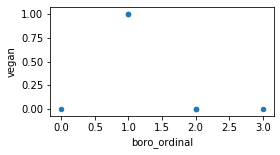

In [41]:
df_int = df.copy()
df_int['vegan'] = df.vegan.astype("category").cat.codes
plt.figure(figsize=(4, 2))
df_int.plot(x='boro_ordinal', y='vegan', kind='scatter', ax=plt.gca())
plt.savefig("images/boro_ordinal.png")

In [42]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression().fit(df[['boro_ordinal']], df.vegan)
lr.coef_

array([[-0.45784715]])

In [43]:
lr.intercept_

array([-0.03782071])

In [44]:
dec = lr.decision_function(np.linspace(0, 3).reshape(-1, 1))

In [45]:
lr.predict(np.linspace(0, 3).reshape(-1, 1))

array(['No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No'], dtype=object)

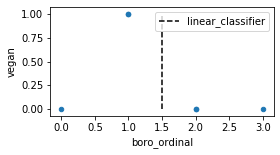

In [46]:
plt.figure(figsize=(4, 2))
df_int.plot(x='boro_ordinal', y='vegan', kind='scatter', ax=plt.gca())
plt.vlines([1.5], 0, 1, linestyle='--', label='linear_classifier')
plt.legend(loc='best')
plt.savefig("images/boro_ordinal_classification.png")

In [47]:
df = pd.DataFrame({'boro': ['Manhattan', 'Queens', 'Manhattan', 'Brooklyn', 'Brooklyn', 'Bronx'],
                   'salary': [103, 89, 142, 54, 63, 219],
                   'vegan': ['No', 'No','No','Yes', 'Yes', 'No']})
df

,boro,salary,vegan
0,Manhattan,103,No
1,Queens,89,No
2,Manhattan,142,No
3,Brooklyn,54,Yes
4,Brooklyn,63,Yes
5,Bronx,219,No


In [48]:
df2html(df)

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th><th>boro</th><th>salary</th><th>vegan</th></tr>
  </thead>
  <tbody>
    <tr><th>0</th><td>Manhattan</td><td>103</td><td>No</td></tr>
    <tr><th>1</th><td>Queens</td><td>89</td><td>No</td></tr>
    <tr><th>2</th><td>Manhattan</td><td>142</td><td>No</td></tr>
    <tr><th>3</th><td>Brooklyn</td><td>54</td><td>Yes</td></tr>
    <tr><th>4</th><td>Brooklyn</td><td>63</td><td>Yes</td></tr>
    <tr><th>5</th><td>Bronx</td><td>219</td><td>No</td></tr>
  </tbody>
</table>
</div>


In [49]:
df2html(pd.get_dummies(df))

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th><th>salary</th><th>boro_Bronx</th><th>boro_Brooklyn</th><th>boro_Manhattan</th><th>boro_Queens</th><th>vegan_No</th><th>vegan_Yes</th></tr>
  </thead>
  <tbody>
    <tr><th>0</th><td>103</td><td>0</td><td>0</td><td>1</td><td>0</td><td>1</td><td>0</td></tr>
    <tr><th>1</th><td>89</td><td>0</td><td>0</td><td>0</td><td>1</td><td>1</td><td>0</td></tr>
    <tr><th>2</th><td>142</td><td>0</td><td>0</td><td>1</td><td>0</td><td>1</td><td>0</td></tr>
    <tr><th>3</th><td>54</td><td>0</td><td>1</td><td>0</td><td>0</td><td>0</td><td>1</td></tr>
    <tr><th>4</th><td>63</td><td>0</td><td>1</td><td>0</td><td>0</td><td>0</td><td>1</td></tr>
    <tr><th>5</th><td>219</td

In [50]:
import re
def df2html(df):
    shorter = df.to_html().replace("th>\n", "th>")
    shorter = shorter.replace("<tr>\n", "<tr>")

    shorter = shorter.replace("td>\n", "td>")
    shorter = re.sub(">[ \t]+<", "><", shorter)
    print(shorter)

In [51]:
df2html(pd.get_dummies(df))

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th><th>salary</th><th>boro_Bronx</th><th>boro_Brooklyn</th><th>boro_Manhattan</th><th>boro_Queens</th><th>vegan_No</th><th>vegan_Yes</th></tr>
  </thead>
  <tbody>
    <tr><th>0</th><td>103</td><td>0</td><td>0</td><td>1</td><td>0</td><td>1</td><td>0</td></tr>
    <tr><th>1</th><td>89</td><td>0</td><td>0</td><td>0</td><td>1</td><td>1</td><td>0</td></tr>
    <tr><th>2</th><td>142</td><td>0</td><td>0</td><td>1</td><td>0</td><td>1</td><td>0</td></tr>
    <tr><th>3</th><td>54</td><td>0</td><td>1</td><td>0</td><td>0</td><td>0</td><td>1</td></tr>
    <tr><th>4</th><td>63</td><td>0</td><td>1</td><td>0</td><td>0</td><td>0</td><td>1</td></tr>
    <tr><th>5</th><td>219</td><td>1</td><td>0</td><td>0</td><td>0</td><td>1</td><td>0</td></tr>
  </tbody>
</table>


In [52]:
pd.get_dummies(df, columns=['boro'])

,salary,vegan,boro_Bronx,boro_Brooklyn,boro_Manhattan,boro_Queens
0,103,No,0,0,1,0
1,89,No,0,0,0,1
2,142,No,0,0,1,0
3,54,Yes,0,1,0,0
4,63,Yes,0,1,0,0
5,219,No,1,0,0,0


In [53]:
df2html(pd.get_dummies(df, columns=['boro']))

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th><th>salary</th><th>vegan</th><th>boro_Bronx</th><th>boro_Brooklyn</th><th>boro_Manhattan</th><th>boro_Queens</th></tr>
  </thead>
  <tbody>
    <tr><th>0</th><td>103</td><td>No</td><td>0</td><td>0</td><td>1</td><td>0</td></tr>
    <tr><th>1</th><td>89</td><td>No</td><td>0</td><td>0</td><td>0</td><td>1</td></tr>
    <tr><th>2</th><td>142</td><td>No</td><td>0</td><td>0</td><td>1</td><td>0</td></tr>
    <tr><th>3</th><td>54</td><td>Yes</td><td>0</td><td>1</td><td>0</td><td>0</td></tr>
    <tr><th>4</th><td>63</td><td>Yes</td><td>0</td><td>1</td><td>0</td><td>0</td></tr>
    <tr><th>5</th><td>219</td><td>No</td><td>1</td><td>0</td><td>0</td><td>0</td></tr>
  </tbody>
</table>


In [54]:
df_ordinal = df.copy()
df_ordinal['boro'] = df.boro.astype("category").cat.codes
df_ordinal

,boro,salary,vegan
0,2,103,No
1,3,89,No
2,2,142,No
3,1,54,Yes
4,1,63,Yes
5,0,219,No


In [55]:
df2html(df_ordinal)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th><th>boro</th><th>salary</th><th>vegan</th></tr>
  </thead>
  <tbody>
    <tr><th>0</th><td>2</td><td>103</td><td>No</td></tr>
    <tr><th>1</th><td>3</td><td>89</td><td>No</td></tr>
    <tr><th>2</th><td>2</td><td>142</td><td>No</td></tr>
    <tr><th>3</th><td>1</td><td>54</td><td>Yes</td></tr>
    <tr><th>4</th><td>1</td><td>63</td><td>Yes</td></tr>
    <tr><th>5</th><td>0</td><td>219</td><td>No</td></tr>
  </tbody>
</table>


In [56]:
pd.get_dummies(df_ordinal, columns=['boro'])

,salary,vegan,boro_0,boro_1,boro_2,boro_3
0,103,No,0,0,1,0
1,89,No,0,0,0,1
2,142,No,0,0,1,0
3,54,Yes,0,1,0,0
4,63,Yes,0,1,0,0
5,219,No,1,0,0,0


In [57]:
df2html(pd.get_dummies(df_ordinal, columns=['boro']))

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th><th>salary</th><th>vegan</th><th>boro_0</th><th>boro_1</th><th>boro_2</th><th>boro_3</th></tr>
  </thead>
  <tbody>
    <tr><th>0</th><td>103</td><td>No</td><td>0</td><td>0</td><td>1</td><td>0</td></tr>
    <tr><th>1</th><td>89</td><td>No</td><td>0</td><td>0</td><td>0</td><td>1</td></tr>
    <tr><th>2</th><td>142</td><td>No</td><td>0</td><td>0</td><td>1</td><td>0</td></tr>
    <tr><th>3</th><td>54</td><td>Yes</td><td>0</td><td>1</td><td>0</td><td>0</td></tr>
    <tr><th>4</th><td>63</td><td>Yes</td><td>0</td><td>1</td><td>0</td><td>0</td></tr>
    <tr><th>5</th><td>219</td><td>No</td><td>1</td><td>0</td><td>0</td><td>0</td></tr>
  </tbody>
</table>


In [58]:
df = pd.DataFrame({'boro': ['Manhattan', 'Queens', 'Manhattan', 'Brooklyn', 'Brooklyn', 'Bronx'],
                   'salary': [103, 89, 142, 54, 63, 219],
                   'vegan': ['No', 'No','No','Yes', 'Yes', 'No']})
df_dummies = pd.get_dummies(df, columns=['boro'])
display(df_dummies)
df2html(df_dummies)

,salary,vegan,boro_Bronx,boro_Brooklyn,boro_Manhattan,boro_Queens
0,103,No,0,0,1,0
1,89,No,0,0,0,1
2,142,No,0,0,1,0
3,54,Yes,0,1,0,0
4,63,Yes,0,1,0,0
5,219,No,1,0,0,0


<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th><th>salary</th><th>vegan</th><th>boro_Bronx</th><th>boro_Brooklyn</th><th>boro_Manhattan</th><th>boro_Queens</th></tr>
  </thead>
  <tbody>
    <tr><th>0</th><td>103</td><td>No</td><td>0</td><td>0</td><td>1</td><td>0</td></tr>
    <tr><th>1</th><td>89</td><td>No</td><td>0</td><td>0</td><td>0</td><td>1</td></tr>
    <tr><th>2</th><td>142</td><td>No</td><td>0</td><td>0</td><td>1</td><td>0</td></tr>
    <tr><th>3</th><td>54</td><td>Yes</td><td>0</td><td>1</td><td>0</td><td>0</td></tr>
    <tr><th>4</th><td>63</td><td>Yes</td><td>0</td><td>1</td><td>0</td><td>0</td></tr>
    <tr><th>5</th><td>219</td><td>No</td><td>1</td><td>0</td><td>0</td><td>0</td></tr>
  </tbody>
</table>


In [59]:
df = pd.DataFrame({'boro': ['Brooklyn', 'Manhattan', 'Brooklyn', 'Queens', 'Brooklyn', 'Staten Island'],
                   'salary': [61, 146, 142, 212, 98, 47],
                   'vegan': ['Yes', 'No','Yes','No', 'Yes', 'No']})
df_dummies = pd.get_dummies(df, columns=['boro'])
display(df_dummies)
df2html(df_dummies)

,salary,vegan,boro_Brooklyn,boro_Manhattan,boro_Queens,boro_Staten Island
0,61,Yes,1,0,0,0
1,146,No,0,1,0,0
2,142,Yes,1,0,0,0
3,212,No,0,0,1,0
4,98,Yes,1,0,0,0
5,47,No,0,0,0,1


<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th><th>salary</th><th>vegan</th><th>boro_Brooklyn</th><th>boro_Manhattan</th><th>boro_Queens</th><th>boro_Staten Island</th></tr>
  </thead>
  <tbody>
    <tr><th>0</th><td>61</td><td>Yes</td><td>1</td><td>0</td><td>0</td><td>0</td></tr>
    <tr><th>1</th><td>146</td><td>No</td><td>0</td><td>1</td><td>0</td><td>0</td></tr>
    <tr><th>2</th><td>142</td><td>Yes</td><td>1</td><td>0</td><td>0</td><td>0</td></tr>
    <tr><th>3</th><td>212</td><td>No</td><td>0</td><td>0</td><td>1</td><td>0</td></tr>
    <tr><th>4</th><td>98</td><td>Yes</td><td>1</td><td>0</td><td>0</td><td>0</td></tr>
    <tr><th>5</th><td>47</td><td>No</td><td>0</td><td>0</td><td>0</td><td>1</td></tr>
  </tbody>
</table>


In [60]:
df = pd.DataFrame({'boro': ['Manhattan', 'Queens', 'Manhattan', 'Brooklyn', 'Brooklyn', 'Bronx'],
                   'salary': [103, 89, 142, 54, 63, 219],
                   'vegan': ['No', 'No','No','Yes', 'Yes', 'No']})
df['boro'] = pd.Categorical(
    df.boro, categories=['Manhattan', 'Queens', 'Brooklyn', 'Bronx', 'Staten Island'])
df_dummies = pd.get_dummies(df, columns=['boro'])
display(df_dummies)
df2html(df_dummies)

,salary,vegan,boro_Manhattan,boro_Queens,boro_Brooklyn,boro_Bronx,boro_Staten Island
0,103,No,1,0,0,0,0
1,89,No,0,1,0,0,0
2,142,No,1,0,0,0,0
3,54,Yes,0,0,1,0,0
4,63,Yes,0,0,1,0,0
5,219,No,0,0,0,1,0


<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th><th>salary</th><th>vegan</th><th>boro_Manhattan</th><th>boro_Queens</th><th>boro_Brooklyn</th><th>boro_Bronx</th><th>boro_Staten Island</th></tr>
  </thead>
  <tbody>
    <tr><th>0</th><td>103</td><td>No</td><td>1</td><td>0</td><td>0</td><td>0</td><td>0</td></tr>
    <tr><th>1</th><td>89</td><td>No</td><td>0</td><td>1</td><td>0</td><td>0</td><td>0</td></tr>
    <tr><th>2</th><td>142</td><td>No</td><td>1</td><td>0</td><td>0</td><td>0</td><td>0</td></tr>
    <tr><th>3</th><td>54</td><td>Yes</td><td>0</td><td>0</td><td>1</td><td>0</td><td>0</td></tr>
    <tr><th>4</th><td>63</td><td>Yes</td><td>0</td><td>0</td><td>1</td><td>0</td><td>0</td></tr>
    <tr><th>5</th><td>219</td><td>No</td><td>0</td><td>0</td><td>0</td><td>1</td><td>0</td></tr>
  </tbody>
</table>


In [61]:
from sklearn.preprocessing import OneHotEncoder
df = pd.DataFrame({'salary': [103, 89, 142, 54, 63, 219],
                   'boro': ['Manhattan', 'Queens', 'Manhattan', 'Brooklyn', 'Brooklyn', 'Bronx']})
ce = OneHotEncoder().fit(df)
ce.transform(df).toarray()

array([[0., 0., 0., 1., 0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 1., 0., 0., 0.]])

In [62]:
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LogisticRegression
# The Future!

categorical = df.dtypes == object
preprocess = make_column_transformer(
    (StandardScaler(), ~categorical),
    (OneHotEncoder(), categorical))
model = make_pipeline(preprocess, LogisticRegression())

# target featurizer

In [78]:
data.frame.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [79]:
data.frame.zipcode.value_counts()

98103.0    602
98038.0    590
98115.0    583
98052.0    574
98117.0    553
          ... 
98102.0    105
98010.0    100
98024.0     81
98148.0     57
98039.0     50
Name: zipcode, Length: 70, dtype: int64

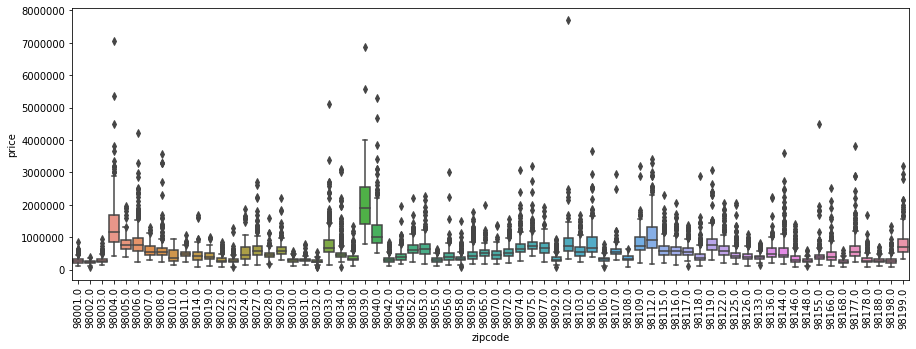

In [80]:
import seaborn as sns
plt.figure(figsize=(15, 5))
ax = sns.boxplot(data.frame.zipcode, data.frame.price)
#plt.tight_layout()
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);
plt.savefig("images/zip_code_prices.png")

In [81]:
data = fetch_openml("house_sales", as_frame=True)
X = data.frame.drop(['date', 'price'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, target)
X_train.columns

/home/andy/checkout/scikit-learn/sklearn/datasets/_openml.py:372: UserWarning: Multiple active versions of the dataset matching the name house_sales exist. Versions may be fundamentally different, returning version 1.
  " {version}.".format(name=name, version=res[0]['version']))


Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [82]:
# drop some stuff so it fits on slide
import pandas as pd
pd.set_option('display.max_columns', 10)
#disp = X_train.drop(['waterfront', 'view', 'condition', 'grade', 'sqft_basement', 'yr_renovated'], axis=1).head()
disp = X_train.head()
disp

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,...,zipcode,lat,long,sqft_living15,sqft_lot15
3054,2.0,1.00,1080.0,6250.0,1.0,...,98118.0,47.5128,-122.251,2100.0,6875.0
19002,2.0,1.00,830.0,26329.0,1.0,...,98070.0,47.4012,-122.425,2030.0,27338.0
11673,5.0,3.50,5000.0,26540.0,2.0,...,98040.0,47.5665,-122.210,3360.0,17398.0
13758,3.0,3.25,2940.0,5432.0,3.0,...,98109.0,47.6299,-122.354,4400.0,5500.0
12526,3.0,1.75,1550.0,8134.0,1.0,...,98008.0,47.6136,-122.121,1360.0,8000.0


In [83]:
disp._repr_html_()

'<div>\n<style scoped>\n    .dataframe tbody tr th:only-of-type {\n        vertical-align: middle;\n    }\n\n    .dataframe tbody tr th {\n        vertical-align: top;\n    }\n\n    .dataframe thead th {\n        text-align: right;\n    }\n</style>\n<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>bedrooms</th>\n      <th>bathrooms</th>\n      <th>sqft_living</th>\n      <th>sqft_lot</th>\n      <th>floors</th>\n      <th>...</th>\n      <th>zipcode</th>\n      <th>lat</th>\n      <th>long</th>\n      <th>sqft_living15</th>\n      <th>sqft_lot15</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>3054</th>\n      <td>2.0</td>\n      <td>1.00</td>\n      <td>1080.0</td>\n      <td>6250.0</td>\n      <td>1.0</td>\n      <td>...</td>\n      <td>98118.0</td>\n      <td>47.5128</td>\n      <td>-122.251</td>\n      <td>2100.0</td>\n      <td>6875.0</td>\n    </tr>\n    <tr>\n      <th>19002</th>\n      <td>2.0</td>\n    

In [84]:
df2html(disp)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th><th>bedrooms</th><th>bathrooms</th><th>sqft_living</th><th>sqft_lot</th><th>floors</th><th>waterfront</th><th>view</th><th>condition</th><th>grade</th><th>sqft_above</th><th>sqft_basement</th><th>yr_built</th><th>yr_renovated</th><th>zipcode</th><th>lat</th><th>long</th><th>sqft_living15</th><th>sqft_lot15</th></tr>
  </thead>
  <tbody>
    <tr><th>3054</th><td>2.0</td><td>1.00</td><td>1080.0</td><td>6250.0</td><td>1.0</td><td>0.0</td><td>2.0</td><td>4.0</td><td>7.0</td><td>1080.0</td><td>0.0</td><td>1942.0</td><td>1968.0</td><td>98118.0</td><td>47.5128</td><td>-122.251</td><td>2100.0</td><td>6875.0</td></tr>
    <tr><th>19002</th><td>2.0</td><td>1.00</td><td>830.0</td><td>26329.0</td><td>1.0</td><td>1.0</td><td>3.0</td><td>4.0</td><td>6.0</td><td>830.0</td><td>0.0</td><td>1928.0</td><td>0.0</td><td>98070.0</td><td>47.4012</td><td>-122.425</td><td>2030.0</td><td>27338.0</td></tr>
    <tr><

In [85]:
te = TargetEncoder(cols='zipcode').fit(X_train, y_train)
te.transform(X_train).head()

NameError: name 'TargetEncoder' is not defined

In [ ]:
disp2 = te.transform(X_train).head()
df2html(disp2)

In [ ]:
pd.DataFrame(y.groupby(X.zipcode).mean()[X_train.head().zipcode]).T

In [ ]:
df2html(pd.DataFrame(y_train.groupby(X_train.zipcode).mean()[X_train.head().zipcode]).T)

In [ ]:
from category_encoders import LeaveOneOutEncoder, TargetEncoder

In [ ]:

X = data.frame.drop(['date', 'price'], axis=1)
pipe_target = make_pipeline(TargetEncoder(cols='zipcode'), Ridge())
scores = cross_val_score(pipe_target, X, target)
np.mean(scores)

In [ ]:
X = data.frame.drop(['date', 'price', 'zipcode'], axis=1)
scores = cross_val_score(Ridge(), X, target)
np.mean(scores)

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
X = data.frame.drop(['date', 'price'], axis=1)

pipe_ohe = make_pipeline(make_column_transformer((OneHotEncoder(), ['zipcode']), remainder='passthrough'), Ridge())
scores = cross_val_score(pipe_ohe, X, target)
np.mean(scores)

In [ ]:
X.columns

In [ ]:
TargetEncoder(cols='zipcode').fit_transform(data.frame, y)